#Лабораторна робота №2

#Завдання 2.

1. Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

2. Розмір датасета:
(418, 12)

3. Типи даних:
PassengerId      int

<ipython-input-7-0557b3724a7a>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
<ipython-input-7-0557b3724a7a>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['FareGroup'] = pd.cut(df_selected['Fare'], bins=[0, 25, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])
<ipython-input-7-0557b3724a7a>:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

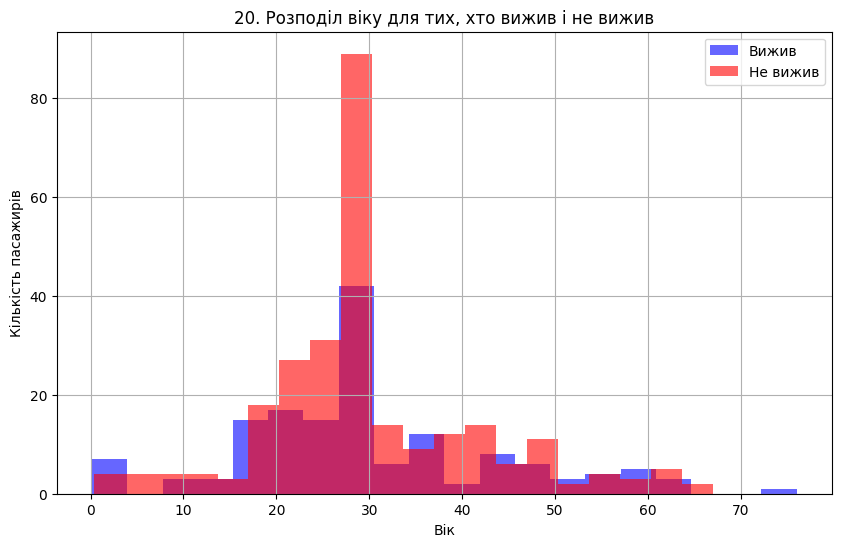

Пасажири молодшого віку мали кращі шанси на виживання.

21. Відсоток виживання за статтю та класом:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64
Жінки в 1-му класі мали найвищий рівень виживання.

22. Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000
Виживання має найбільшу негативну кореляцію з Pclass.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження датасету Titanic
df = pd.read_csv('titanic.csv')

# 1. Вивести перших 5 рядків
print("1. Перші 5 рядків:")
print(df.head())

# 2. Визначити розмір датасета
print("\n2. Розмір датасета:")
print(df.shape)

# 3. Визначити тип даних
print("\n3. Типи даних:")
print(df.dtypes)

# 4. Визначити наявність пропущених значень
print("\n4. Кількість пропущених значень перед заповненням:")
print(df.isnull().sum())

# Замінити пропущені значення на середнє (тільки для числових стовпців)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# 5. Ще раз перевірити наявність пропущених значень
print("\n5. Кількість пропущених значень після заповнення:")
print(df.isnull().sum())

# 6. Перевірити наявність дублікатів
print("\n6. Кількість дублікатів перед видаленням:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Кількість дублікатів після видалення:", df.duplicated().sum())

# 7. Вивести описову статистику датасету
print("\n7. Описова статистика:")
print(df.describe())

# 8. Видалити стовпчик Cabin
df.drop(columns=['Cabin'], inplace=True)

# 9. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]

# 10. Замінити бінарні ознаки (Стать) на 0 і 1
print("\n10. Унікальні значення стовпця 'Sex':")
print(df_selected['Sex'].unique())
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

# 11. Ще раз перевірити кількість пропущених даних
print("\n11. Кількість пропущених значень у вибраному датасеті:")
print(df_selected.isnull().sum())

# 12. Вивести 5 перших рядків датасету
print("\n12. Перші 5 рядків вибраного датасету:")
print(df_selected.head())

# 13. Вивести 5 останніх рядків датасету
print("\n13. Останні 5 рядків вибраного датасету:")
print(df_selected.tail())

# 14. Аналіз виживання залежно від статі
survival_by_sex = df_selected.groupby('Sex')['Survived'].mean() * 100
print("\n14. Відсоток виживання за статтю:")
print(survival_by_sex)
print("Жінки мали значно вищий рівень виживання, ніж чоловіки.")

# 15. Відсоток виживання для кожного класу
survival_by_class = df_selected.groupby('Pclass')['Survived'].mean() * 100
print("\n15. Відсоток виживання за класом:")
print(survival_by_class)
print("Перший клас мав найвищий рівень виживання.")

# 16. Середній вік тих, хто вижив і не вижив
avg_age_survived = df_selected[df_selected['Survived'] == 1]['Age'].mean()
avg_age_not_survived = df_selected[df_selected['Survived'] == 0]['Age'].mean()
print("\n16. Середній вік тих, хто вижив:", avg_age_survived)
print("Середній вік тих, хто не вижив:", avg_age_not_survived)
print("Молодші пасажири мали трохи вищі шанси на виживання.")

# 17. Розподіл пасажирів за рівнями тарифів і рівень виживання
df_selected['FareGroup'] = pd.cut(df_selected['Fare'], bins=[0, 25, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])
survival_by_fare = df_selected.groupby('FareGroup')['Survived'].mean() * 100
print("\n17. Рівень виживання за групами тарифів:")
print(survival_by_fare)
print("Пасажири з вищими тарифами мали більші шанси на виживання.")

# 18. Середній тариф для кожного класу
avg_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()
print("\n18. Середній тариф за класом:")
print(avg_fare_by_class)
print("Існує значна різниця у тарифах між класами.")

# 19. Середній вік пасажирів для кожного класу
avg_age_by_class = df_selected.groupby('Pclass')['Age'].mean()
print("\n19. Середній вік пасажирів за класом:")
print(avg_age_by_class)
print("Пасажири вищих класів були старшими в середньому.")

# 20. Гістограма розподілу віку для тих, хто вижив і не вижив
plt.figure(figsize=(10, 6))
df_selected[df_selected['Survived'] == 1]['Age'].hist(alpha=0.6, bins=20, color='blue', label='Вижив')
df_selected[df_selected['Survived'] == 0]['Age'].hist(alpha=0.6, bins=20, color='red', label='Не вижив')
plt.title('20. Розподіл віку для тих, хто вижив і не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.show()
print("Пасажири молодшого віку мали кращі шанси на виживання.")

# 21. Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\n21. Відсоток виживання за статтю та класом:")
print(survival_by_sex_class)
print("Жінки в 1-му класі мали найвищий рівень виживання.")

# 22. Кореляція між числовими змінними
correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("\n22. Кореляція між числовими змінними:")
print(correlation_matrix)
print("Виживання має найбільшу негативну кореляцію з Pclass.")


Висновок:

Аналіз датасету "Титанік" показав наступне:

Виживання за статтю: Жінки мали значно вищий рівень виживання порівняно з чоловіками.
Виживання за класом: Пасажири першого класу мали найвищий рівень виживання, тоді як пасажири третього класу — найнижчий.
Вік і виживання: Молодші пасажири мали трохи вищі шанси на виживання. Середній вік тих, хто вижив, був нижчим.
Тариф і виживання: Пасажири, які платили вищі тарифи, мали вищі шанси на виживання.
Кореляція: Найбільша негативна кореляція спостерігалася між виживанням і класом (Pclass), що вказує на значний вплив класу на виживання пасажирів.
Загалом, соціальні та економічні фактори, такі як стать, клас, вік і тариф, суттєво впливали на шанси пасажирів на виживання під час катастрофи "Титаніка".